# DATA 620, Assignment 3: 2-Node Network
#### June 20, 2017

### Group 1 Members:

* Mauricio Alarcon
* Sekhar Mekala
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh


### Assignment Description

Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:

* Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis. [For more background information, see also: http://rpackages.ianhowson.com/cran/latentnet/man/davis.html]. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
* Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
* Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?


In [4]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plot
import matplotlib.colors as colors
%matplotlib inline

### 1.0 Data and Graphs

The Davis Southern Club Women data set is available here - http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat. This data set is also included with the NetworkX package. The data set here is included with the NetworkX package and it comes as a bipartite graph (clubs, women).

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women.


In [6]:
plot.rcParams['figure.figsize'] = (21, 14)

G = nx.davis_southern_women_graph()

# Snapshot of the Network
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


In [7]:
women = G.graph['top']
clubs = G.graph['bottom']
top_nodes, bottom_nodes = nx.bipartite.sets(G)

print ""
print "Women:"
print ""
for i in range(len(top_nodes)):
    print '%s    ' % (list(top_nodes)[i])
    
print ""
print "Clubs:"
print ""
for i in range(len(bottom_nodes)):
    print '%s    ' % (list(bottom_nodes)[i])
    


Women:
Theresa Anderson    
Helen Lloyd    
Flora Price    
Katherina Rogers    
Nora Fayette    
Sylvia Avondale    
Verne Sanderson    
Olivia Carleton    
Eleanor Nye    
Brenda Rogers    
Frances Anderson    
Dorothy Murchison    
Ruth DeSand    
Laura Mandeville    
Evelyn Jefferson    
Charlotte McDowd    
Myra Liddel    
Pearl Oglethorpe    

Clubs:
E11    
E10    
E13    
E12    
E14    
E9    
E8    
E5    
E4    
E7    
E6    
E1    
E3    
E2    


### 1.1 The Degrees and the Nodes


In [24]:

g_degrees = sorted(zip(nx.degree(G).values(), nx.degree(G).keys()), reverse=True)

print ''
print "Degrees     Node"
print '-------     --------------'
for i in range(len(g_degrees)):
    print '%2d          %s' % (g_degrees[i][0], g_degrees[i][1])


Degrees     Node
-------     --------------
14          E8
12          E9
10          E7
 8          Theresa Anderson
 8          Nora Fayette
 8          Evelyn Jefferson
 8          E6
 8          E5
 7          Sylvia Avondale
 7          Laura Mandeville
 7          Brenda Rogers
 6          Katherina Rogers
 6          E3
 6          E12
 5          Helen Lloyd
 5          E10
 4          Verne Sanderson
 4          Ruth DeSand
 4          Myra Liddel
 4          Frances Anderson
 4          Eleanor Nye
 4          E4
 4          E11
 4          Charlotte McDowd
 3          Pearl Oglethorpe
 3          E2
 3          E14
 3          E13
 3          E1
 2          Olivia Carleton
 2          Flora Price
 2          Dorothy Murchison


### 1.2 Plot the Network

green=clubs,
pink=women,
node size=degrees

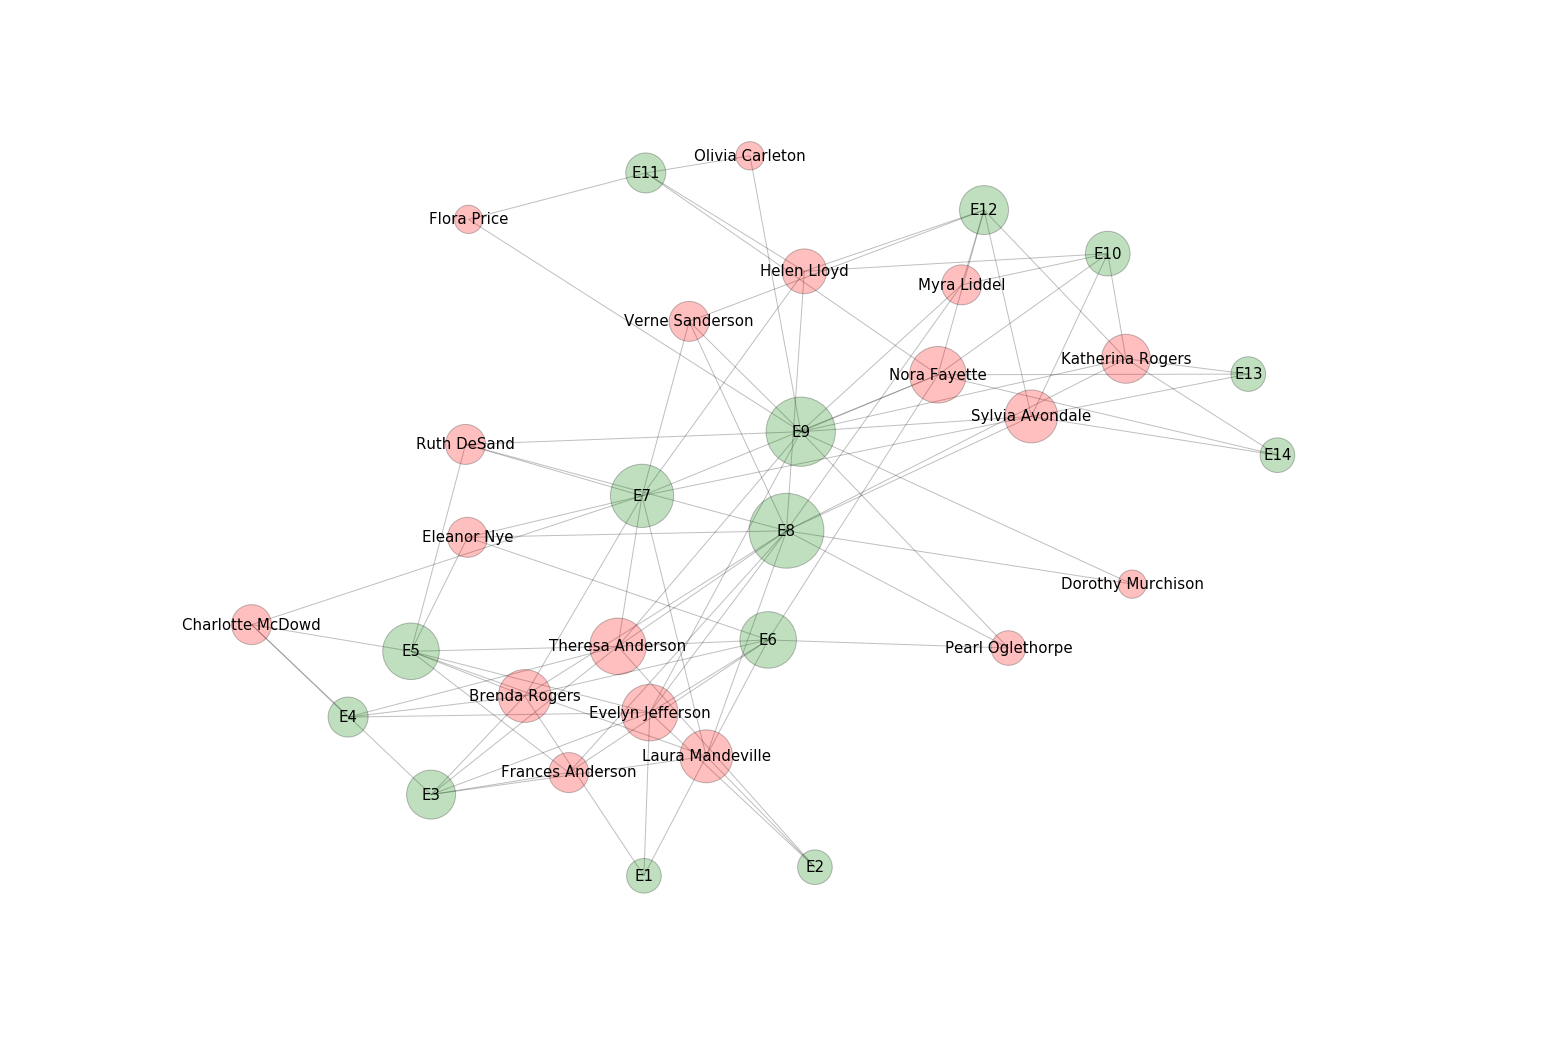

In [9]:
colors=[]
for n in G.degree().keys():
    if n in G.degree(women).keys():
        colors.append('r')
    else:
        colors.append('g')
        
d = G.degree()
nx.draw(G, node_size=[v*400 for v in d.values()], with_labels=True, node_color=colors, alpha=.25, font_size=15)

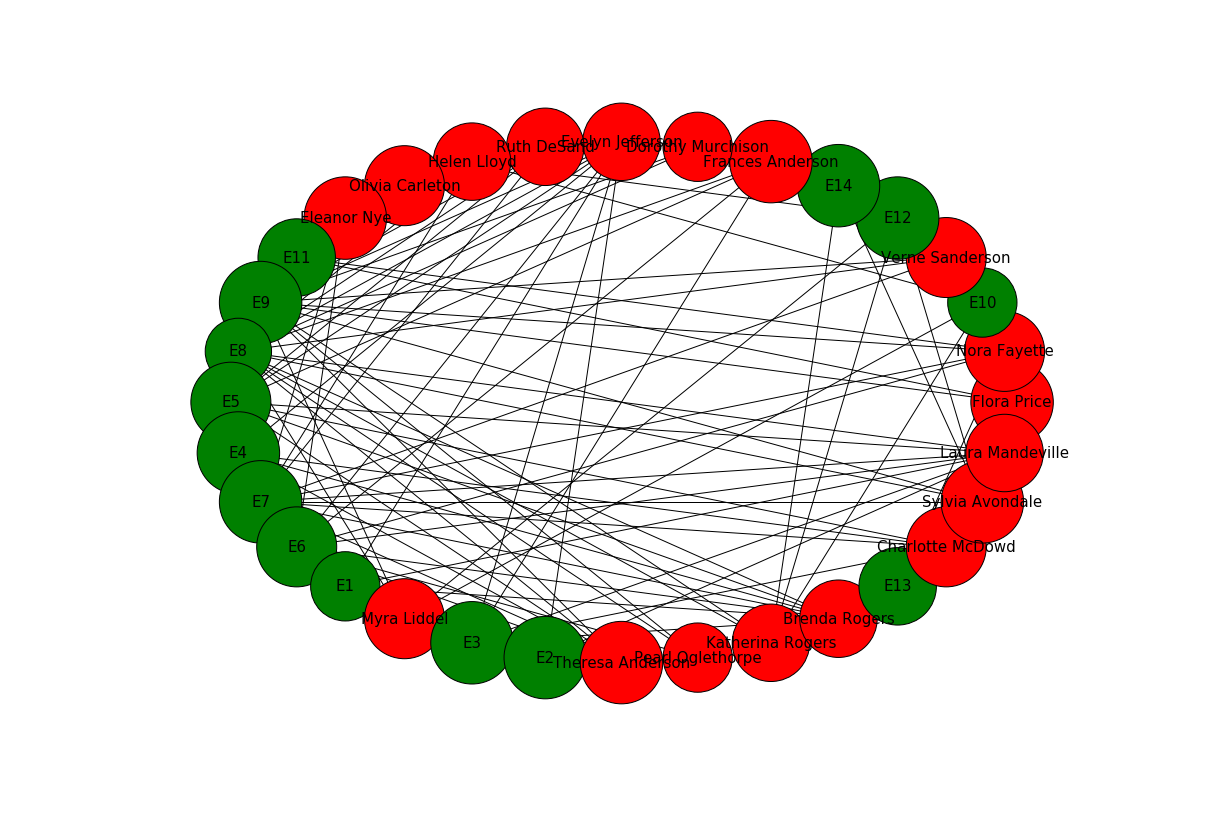

In [27]:
plot.axis("off")
nx.draw_circular(G, node_size=[v*400 for v in d.values()], with_labels = True, node_color = colors, font_size = 15)


### 2.0 Degree Centrality

Project bipartite graph onto women nodes, the degrees are their connections with other women based on participation in the same club events


In [15]:
W = nx.bipartite.weighted_projected_graph(G, women)
w_degrees = sorted(zip(W.degree(women).values(), W.degree(women).keys()), reverse=True)

print ''
print "Degrees   Member"
print ''
for i in range(len(w_degrees)):
    print '%d        %s' % (w_degrees[i][0], w_degrees[i][1])


Degrees   Member

17        Verne Sanderson
17        Theresa Anderson
17        Sylvia Avondale
17        Ruth DeSand
17        Nora Fayette
17        Helen Lloyd
17        Evelyn Jefferson
16        Pearl Oglethorpe
16        Myra Liddel
16        Katherina Rogers
16        Dorothy Murchison
15        Laura Mandeville
15        Frances Anderson
15        Eleanor Nye
15        Brenda Rogers
12        Olivia Carleton
12        Flora Price
11        Charlotte McDowd


The bipartite projection creates a connection between Southern Women if they participate in the same club/social event. Verne Sanderson and six other women had the same number of mutual club/social event connections (17). We can see from our graph above that these associations involved Sanderson's participation in only 4 clubs/social events, and three nodes E7, E8 and E9 had the highest degree centrality.

### 2.1 Plot Bipartite Projection

Node sizes are based on clustering coefficient for each women.

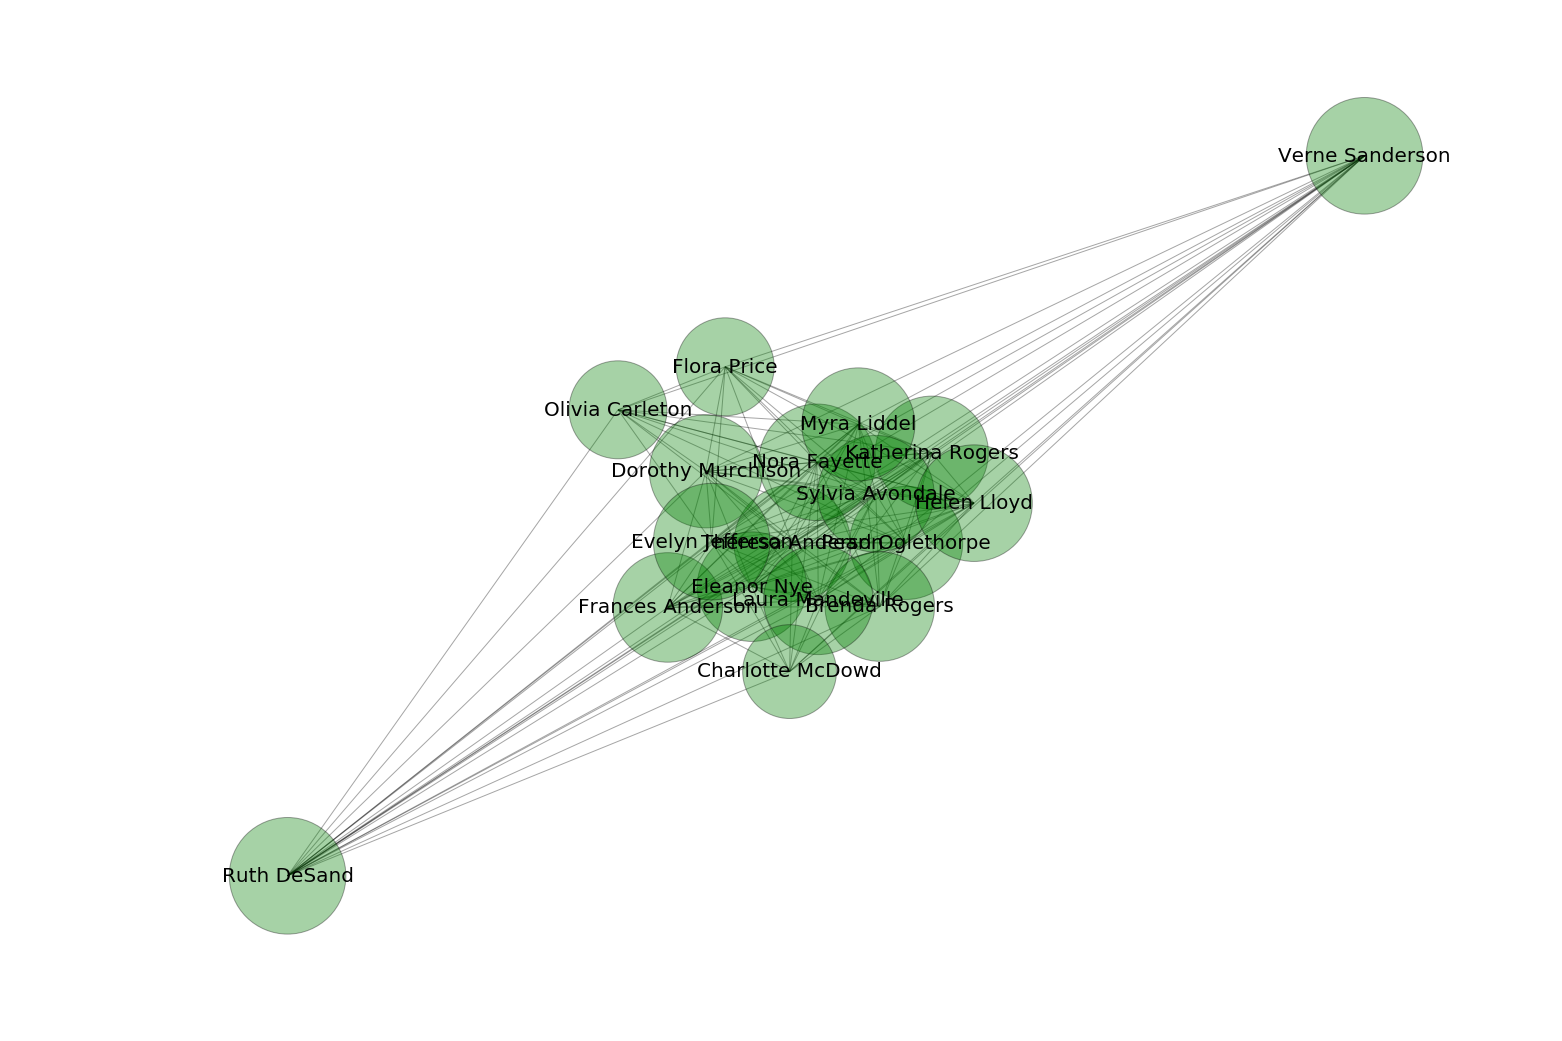

In [16]:
d = nx.degree(W)
nx.draw(W, node_size=[v*800 for v in d.values()], with_labels=True, node_color='g', alpha=.35, font_size=20)

### 2.2 Clustering Coefficients

Women sorted by clustering coefficient.


In [12]:
c_coef = bipartite.clustering(G, women)
clust_coef = sorted(zip(c_coef.values(), c_coef.keys()), reverse=True)
print ''
print "Clustering"
print "Coefficient  Member"
print ''
for i in range(len(clust_coef)):
    print ' %f    %s' % (clust_coef[i][0], clust_coef[i][1])


Clustering
Coefficient  Member
 0.371819    Theresa Anderson
 0.364912    Brenda Rogers
 0.364356    Ruth DeSand
 0.360317    Eleanor Nye
 0.351817    Laura Mandeville
 0.348833    Verne Sanderson
 0.332341    Pearl Oglethorpe
 0.324405    Myra Liddel
 0.322752    Sylvia Avondale
 0.317943    Evelyn Jefferson
 0.314817    Frances Anderson
 0.305010    Dorothy Murchison
 0.297495    Katherina Rogers
 0.294412    Charlotte McDowd
 0.261699    Helen Lloyd
 0.260577    Nora Fayette
 0.257507    Flora Price
 0.257507    Olivia Carleton


The women are all very tightly connected, so clustering coefficients don't do much to distinguish subgroups. Traditional clustering methods are problematic for two-mode networks and projected networks, creating further ambiguity.


### 2.3 Betweenness Centrality

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.

The women split into four distinct groups based on betweenness, i.e., a measure of their boundary spanner status to bridge gaps between groups.

In [20]:
between_cen = nx.betweenness_centrality(W)
between_cen = sorted(zip(between_cen.values(), between_cen.keys()), reverse=True)

print ''
print "Betweenness"
print "Centrality    Member"
print ''
for i in range(len(between_cen)):
    print ' %f     %s' % (between_cen[i][0], between_cen[i][1])


Betweenness
Centrality    Member

 0.010122     Verne Sanderson
 0.010122     Theresa Anderson
 0.010122     Sylvia Avondale
 0.010122     Ruth DeSand
 0.010122     Nora Fayette
 0.010122     Helen Lloyd
 0.010122     Evelyn Jefferson
 0.005348     Pearl Oglethorpe
 0.005348     Myra Liddel
 0.005348     Katherina Rogers
 0.005348     Dorothy Murchison
 0.002674     Laura Mandeville
 0.002674     Frances Anderson
 0.002674     Eleanor Nye
 0.002674     Brenda Rogers
 0.000000     Olivia Carleton
 0.000000     Flora Price
 0.000000     Charlotte McDowd


### 2.4 Closeness Centrality

The closeness of a node is the distance to all other nodes in the graph or in the case that the graph is not connected to all other nodes in the connected component containing that node.

The women separate into the same four groups based closeness, i.e., distance to all other women in the graph. 


In [21]:
clos_cen = nx.closeness_centrality(W)
clos_cen = sorted(zip(clos_cen.values(), clos_cen.keys()), reverse=True)

print ''
print "Closeness"
print "Centrality    Member"
print ''
for i in range(len(clos_cen)):
    print ' %f     %s' % (clos_cen[i][0], clos_cen[i][1])


Closeness
Centrality    Member

 1.000000     Verne Sanderson
 1.000000     Theresa Anderson
 1.000000     Sylvia Avondale
 1.000000     Ruth DeSand
 1.000000     Nora Fayette
 1.000000     Helen Lloyd
 1.000000     Evelyn Jefferson
 0.944444     Pearl Oglethorpe
 0.944444     Myra Liddel
 0.944444     Katherina Rogers
 0.944444     Dorothy Murchison
 0.894737     Laura Mandeville
 0.894737     Frances Anderson
 0.894737     Eleanor Nye
 0.894737     Brenda Rogers
 0.772727     Olivia Carleton
 0.772727     Flora Price
 0.739130     Charlotte McDowd


### 2.5 Triangles

Find the number of triangles that include a node as one vertex. When computing triangles for the entire graph each triangle is counted three times, once at each node. Self loops are ignored.

In [22]:
triang = nx.triangles(W)
triang = sorted(zip(triang.values(), triang.keys()), reverse=True)

print ''
print "Triangles    Member"
print '-------------------------------'
for i in range(len(triang)):
    print ' %3d         %s' % (triang[i][0], triang[i][1])


Triangles    Member
-------------------------------
 122         Verne Sanderson
 122         Theresa Anderson
 122         Sylvia Avondale
 122         Ruth DeSand
 122         Nora Fayette
 122         Helen Lloyd
 122         Evelyn Jefferson
 112         Pearl Oglethorpe
 112         Myra Liddel
 112         Katherina Rogers
 112         Dorothy Murchison
 101         Laura Mandeville
 101         Frances Anderson
 101         Eleanor Nye
 101         Brenda Rogers
  66         Olivia Carleton
  66         Flora Price
  55         Charlotte McDowd


We see that the women with the highest closeness and betweenness are also nodes in more triangles.


From these assessments, we see that the network is very centralized. It was also observed that the network is closed. There were a small number of groups (of women) that attended a large number of events. Conversely, there were a small number of events where nearly all members were present. We can see from the depicted network graphs that the data analyzed here truly represents a two mode network.